In [350]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import math

In [365]:
def chi_square_test(data_count,expected_counts):
    """Return boolean on chi-square test (8 degrees of freedom & P-val=0.05)."""
    chi_square_stat = 0  # chi square test statistic
    for data, expected in zip(data_count,expected_counts):

        chi_square = math.pow(data - expected, 2)

        chi_square_stat += chi_square / expected

    #print("\nChi-squared Test Statistic = {:.3f}".format(chi_square_stat))
    #print("Critical value at a P-value of 0.05 is 15.51.")    
    return chi_square_stat, chi_square_stat < 15.51

In [2]:
states = ['alabama','alaska','arizona','arkansas','california','colorado','connecticut','delaware',
          'florida','georgia','hawaii','idaho','illinois','indiana','iowa','kansas','kentucky','louisiana',
          'maine','maryland','massachusetts','michigan','minnesota','mississippi','missouri','montana','nebraska',
          'nevada','new-hampshire','new-jersey','new-mexico','new-york','north-carolina','north-dakota','ohio',
          'oklahoma','oregon','pennsylvania','rhode-island','south-carolina','south-dakota','tennessee','texas',
          'utah','vermont','virginia','washington','west-virginia','wisconsin','wyoming']

In [3]:
links = ['https://www.nytimes.com/interactive/2020/11/03/us/elections/results-'+i+'-president.html' for i in states]

In [24]:
responses = []
for link in links:
    response = requests.get(link)
    responses.append(response)

In [62]:
soups = [BeautifulSoup(i.text, 'html.parser') for i in responses]

In [196]:
final_dataset = []
for soup in range(len(soups)):
    state = states[soup]
    results_json = json.loads(str(soups[soup].findAll('script', class_='e-map-data'))
                              .split('template">')[1]
                              .split('</script>')[0])['races'][0]['counties']
    for i in results_json:
        county = i['name']
        trump_votes = i['results']['trumpd']
        biden_votes = i['results']['bidenj']
        jorgensen_votes = i['results']['jorgensenj']
        final_dataset.append([state,county,trump_votes,biden_votes,jorgensen_votes])


In [352]:
df = pd.DataFrame(final_dataset)
df.columns = ['state','county','trump_votes','biden_votes','jorgensen_votes']

In [353]:
df['trump_1st_digit'] = df.trump_votes.apply(lambda x: int(str(x)[0]))
df['biden_1st_digit'] = df.biden_votes.apply(lambda x: int(str(x)[0]))
df['jorgensen_1st_digit'] = df.jorgensen_votes.apply(lambda x: int(str(x)[0]))

trump chi square stat=10.06 & passes at .05 p-value (critical value 15.51): True
biden chi square stat=14.77 & passes at .05 p-value (critical value 15.51): True
jorgensen chi square stat=1.6 & passes at .05 p-value (critical value 15.51): True


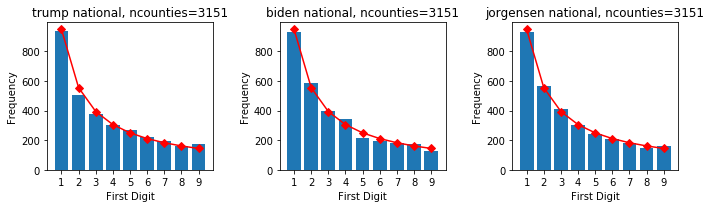

In [359]:
collist = df.columns[-3:]
candidates = ['trump','biden','jorgensen']
N = len(df)
digit = np.arange(1, 10)
expected = np.log10(1 + 1/digit) * N
plt.subplots(1,3,figsize=(10,3))
for idx in range(len(collist)):
    v = df[df[collist[idx]]>0][collist[idx]].value_counts()
    plt.subplot(1, 3, idx+1)
    plt.bar(v.index, v.values)
    plt.xticks(range(1, 10))
    plt.plot(digit, expected, marker='D', color='red')
    plt.title(candidates[idx]+' national, ncounties='+str(N))
    plt.xlabel('First Digit')
    plt.ylabel('Frequency')
    chi_stat, passes = chi_square_test(v.values, expected)
    print(candidates[idx]+' chi square stat='+str(round(chi_stat,2))+' & passes at .05 p-value (critical value 15.51): '+str(passes))
plt.tight_layout()
plt.show()

trump chi square stat=3.23 & passes at .05 p-value (critical value 15.51): True
biden chi square stat=4.2 & passes at .05 p-value (critical value 15.51): True
jorgensen chi square stat=7.12 & passes at .05 p-value (critical value 15.51): True


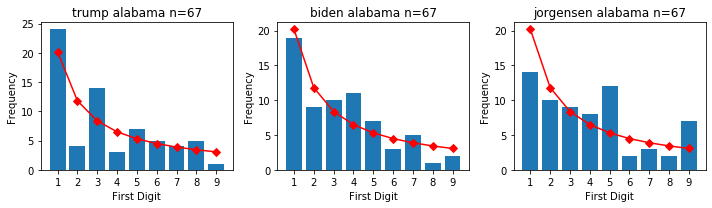

trump chi square stat=11.01 & passes at .05 p-value (critical value 15.51): True
biden chi square stat=3.8 & passes at .05 p-value (critical value 15.51): True
jorgensen chi square stat=5.61 & passes at .05 p-value (critical value 15.51): True


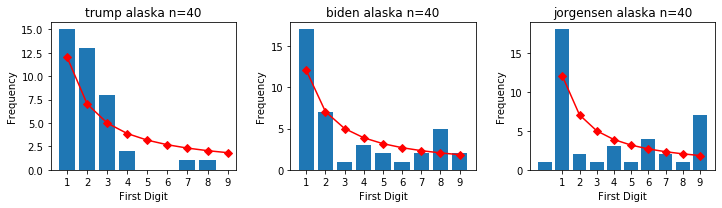

trump chi square stat=1.04 & passes at .05 p-value (critical value 15.51): True
biden chi square stat=1.38 & passes at .05 p-value (critical value 15.51): True
jorgensen chi square stat=3.11 & passes at .05 p-value (critical value 15.51): True


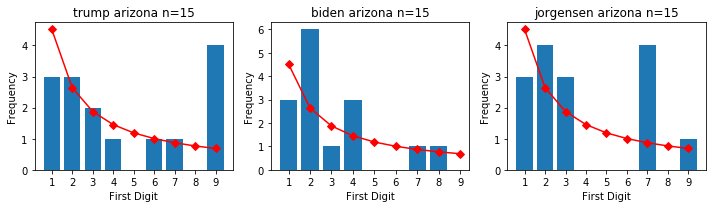

trump chi square stat=6.16 & passes at .05 p-value (critical value 15.51): True
biden chi square stat=8.88 & passes at .05 p-value (critical value 15.51): True
jorgensen chi square stat=1.73 & passes at .05 p-value (critical value 15.51): True


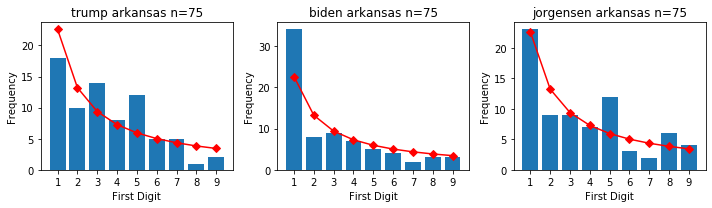

trump chi square stat=1.91 & passes at .05 p-value (critical value 15.51): True
biden chi square stat=6.93 & passes at .05 p-value (critical value 15.51): True
jorgensen chi square stat=5.48 & passes at .05 p-value (critical value 15.51): True


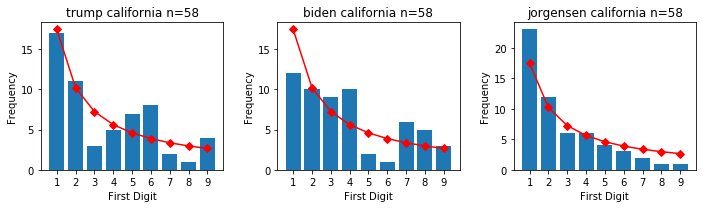

trump chi square stat=1.96 & passes at .05 p-value (critical value 15.51): True
biden chi square stat=6.77 & passes at .05 p-value (critical value 15.51): True
jorgensen chi square stat=3.03 & passes at .05 p-value (critical value 15.51): True


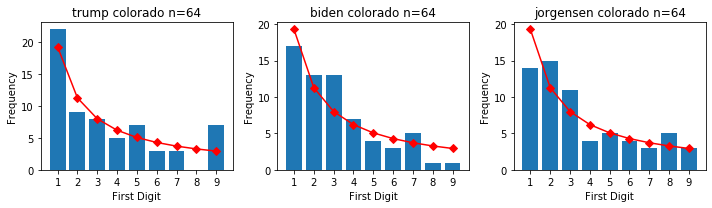

trump chi square stat=0.67 & passes at .05 p-value (critical value 15.51): True
biden chi square stat=1.37 & passes at .05 p-value (critical value 15.51): True
jorgensen chi square stat=0.94 & passes at .05 p-value (critical value 15.51): True


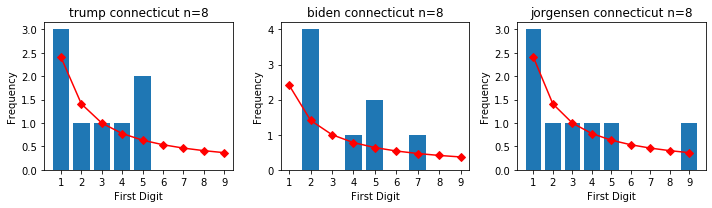

trump chi square stat=1.47 & passes at .05 p-value (critical value 15.51): True
biden chi square stat=1.47 & passes at .05 p-value (critical value 15.51): True
jorgensen chi square stat=1.75 & passes at .05 p-value (critical value 15.51): True


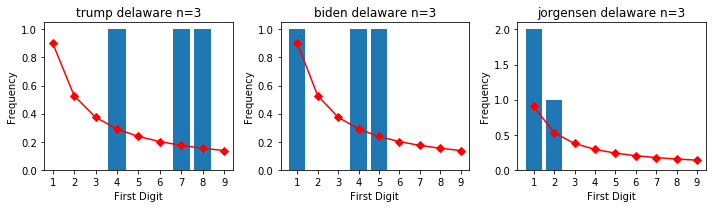

trump chi square stat=3.98 & passes at .05 p-value (critical value 15.51): True
biden chi square stat=1.25 & passes at .05 p-value (critical value 15.51): True
jorgensen chi square stat=5.64 & passes at .05 p-value (critical value 15.51): True


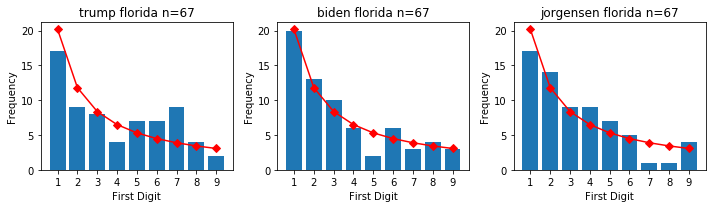

trump chi square stat=3.07 & passes at .05 p-value (critical value 15.51): True
biden chi square stat=9.68 & passes at .05 p-value (critical value 15.51): True
jorgensen chi square stat=5.11 & passes at .05 p-value (critical value 15.51): True


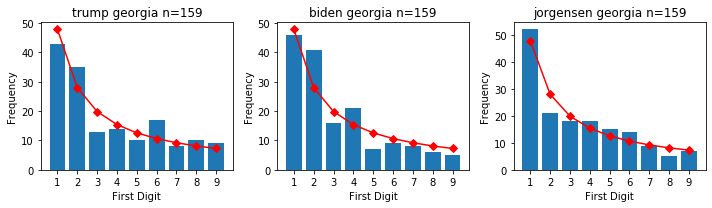

trump chi square stat=2.91 & passes at .05 p-value (critical value 15.51): True
biden chi square stat=1.15 & passes at .05 p-value (critical value 15.51): True
jorgensen chi square stat=1.15 & passes at .05 p-value (critical value 15.51): True


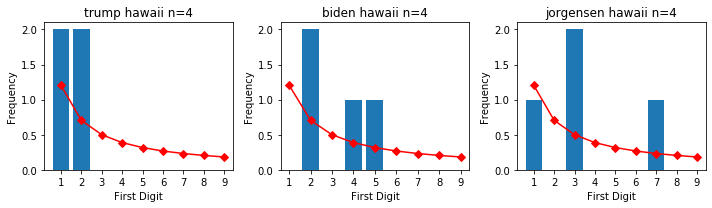

trump chi square stat=3.27 & passes at .05 p-value (critical value 15.51): True
biden chi square stat=2.68 & passes at .05 p-value (critical value 15.51): True
jorgensen chi square stat=2.38 & passes at .05 p-value (critical value 15.51): True


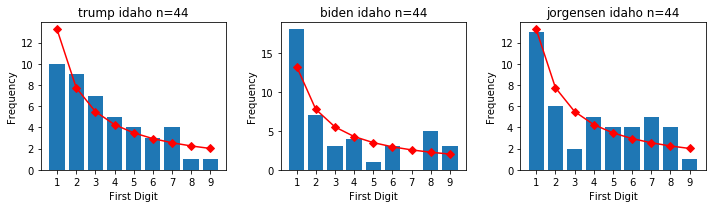

trump chi square stat=1.71 & passes at .05 p-value (critical value 15.51): True
biden chi square stat=2.57 & passes at .05 p-value (critical value 15.51): True
jorgensen chi square stat=1.07 & passes at .05 p-value (critical value 15.51): True


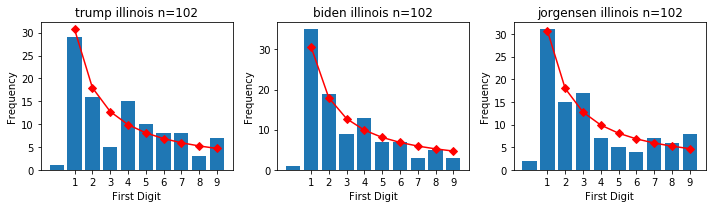

trump chi square stat=3.4 & passes at .05 p-value (critical value 15.51): True
biden chi square stat=8.65 & passes at .05 p-value (critical value 15.51): True
jorgensen chi square stat=6.29 & passes at .05 p-value (critical value 15.51): True


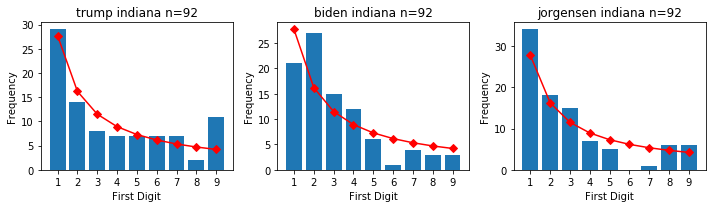

trump chi square stat=14.88 & passes at .05 p-value (critical value 15.51): True
biden chi square stat=4.22 & passes at .05 p-value (critical value 15.51): True
jorgensen chi square stat=3.23 & passes at .05 p-value (critical value 15.51): True


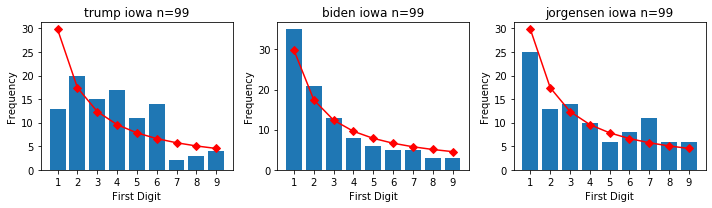

trump chi square stat=3.2 & passes at .05 p-value (critical value 15.51): True
biden chi square stat=5.34 & passes at .05 p-value (critical value 15.51): True
jorgensen chi square stat=5.46 & passes at .05 p-value (critical value 15.51): True


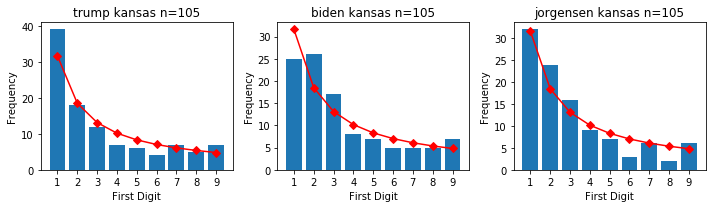

trump chi square stat=9.65 & passes at .05 p-value (critical value 15.51): True
biden chi square stat=2.37 & passes at .05 p-value (critical value 15.51): True
jorgensen chi square stat=4.82 & passes at .05 p-value (critical value 15.51): True


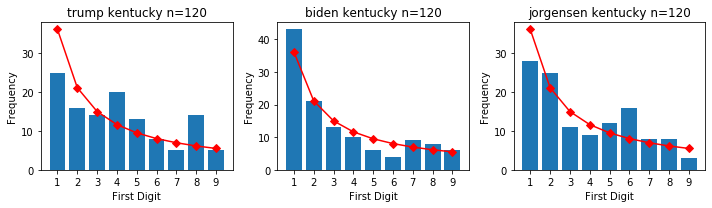

trump chi square stat=1.39 & passes at .05 p-value (critical value 15.51): True
biden chi square stat=1.99 & passes at .05 p-value (critical value 15.51): True
jorgensen chi square stat=1.14 & passes at .05 p-value (critical value 15.51): True


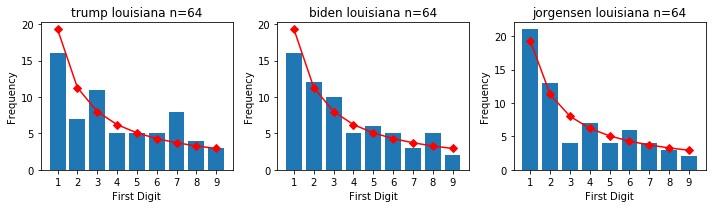

trump chi square stat=0.72 & passes at .05 p-value (critical value 15.51): True
biden chi square stat=2.88 & passes at .05 p-value (critical value 15.51): True
jorgensen chi square stat=2.25 & passes at .05 p-value (critical value 15.51): True


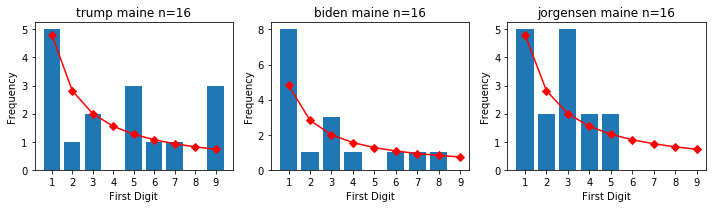

trump chi square stat=0.6 & passes at .05 p-value (critical value 15.51): True
biden chi square stat=2.09 & passes at .05 p-value (critical value 15.51): True
jorgensen chi square stat=2.14 & passes at .05 p-value (critical value 15.51): True


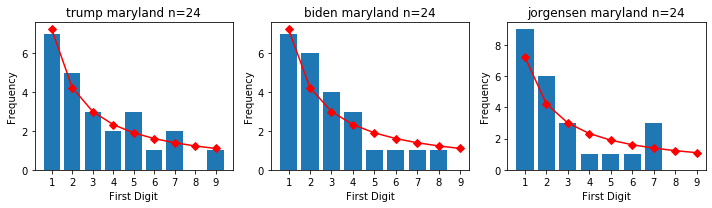

trump chi square stat=2.1 & passes at .05 p-value (critical value 15.51): True
biden chi square stat=1.15 & passes at .05 p-value (critical value 15.51): True
jorgensen chi square stat=0.61 & passes at .05 p-value (critical value 15.51): True


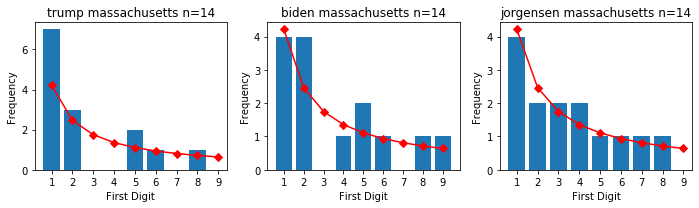

trump chi square stat=4.27 & passes at .05 p-value (critical value 15.51): True
biden chi square stat=4.84 & passes at .05 p-value (critical value 15.51): True
jorgensen chi square stat=4.53 & passes at .05 p-value (critical value 15.51): True


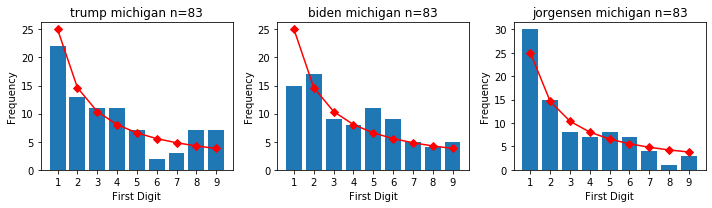

trump chi square stat=1.92 & passes at .05 p-value (critical value 15.51): True
biden chi square stat=3.87 & passes at .05 p-value (critical value 15.51): True
jorgensen chi square stat=3.41 & passes at .05 p-value (critical value 15.51): True


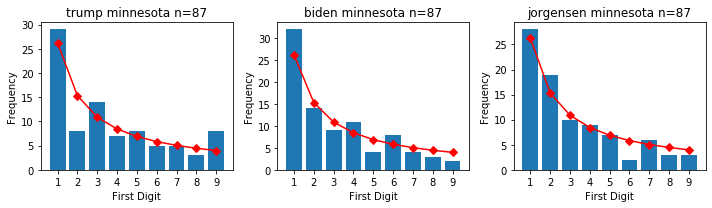

trump chi square stat=3.61 & passes at .05 p-value (critical value 15.51): True
biden chi square stat=7.53 & passes at .05 p-value (critical value 15.51): True
jorgensen chi square stat=5.4 & passes at .05 p-value (critical value 15.51): True


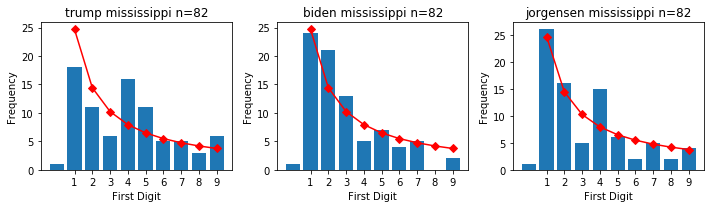

trump chi square stat=5.14 & passes at .05 p-value (critical value 15.51): True
biden chi square stat=1.36 & passes at .05 p-value (critical value 15.51): True
jorgensen chi square stat=3.96 & passes at .05 p-value (critical value 15.51): True


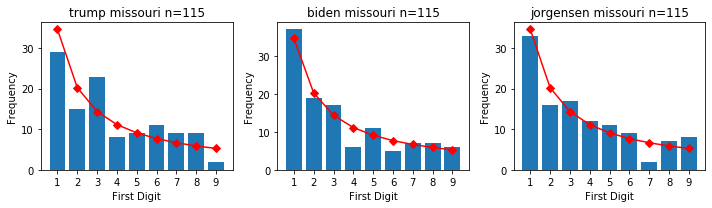

trump chi square stat=2.59 & passes at .05 p-value (critical value 15.51): True
biden chi square stat=2.05 & passes at .05 p-value (critical value 15.51): True
jorgensen chi square stat=6.5 & passes at .05 p-value (critical value 15.51): True


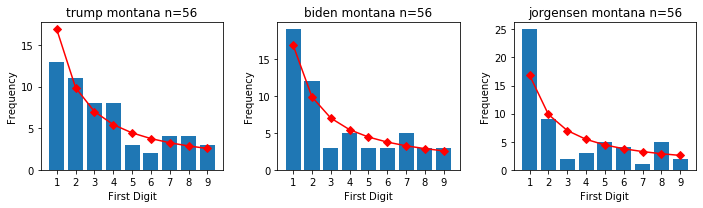

trump chi square stat=10.17 & passes at .05 p-value (critical value 15.51): True
biden chi square stat=4.09 & passes at .05 p-value (critical value 15.51): True
jorgensen chi square stat=3.58 & passes at .05 p-value (critical value 15.51): True


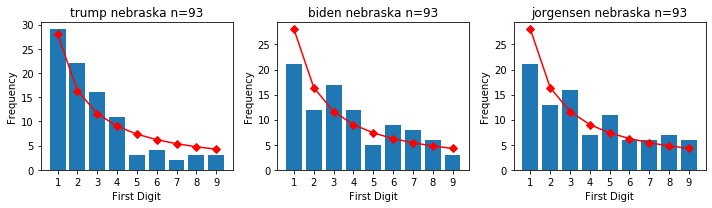

trump chi square stat=2.35 & passes at .05 p-value (critical value 15.51): True
biden chi square stat=0.87 & passes at .05 p-value (critical value 15.51): True
jorgensen chi square stat=0.76 & passes at .05 p-value (critical value 15.51): True


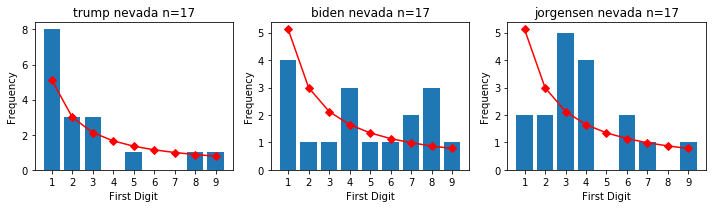

trump chi square stat=1.45 & passes at .05 p-value (critical value 15.51): True
biden chi square stat=1.45 & passes at .05 p-value (critical value 15.51): True
jorgensen chi square stat=1.35 & passes at .05 p-value (critical value 15.51): True


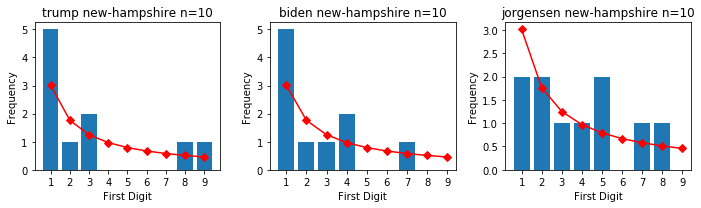

trump chi square stat=4.42 & passes at .05 p-value (critical value 15.51): True
biden chi square stat=3.56 & passes at .05 p-value (critical value 15.51): True
jorgensen chi square stat=0.75 & passes at .05 p-value (critical value 15.51): True


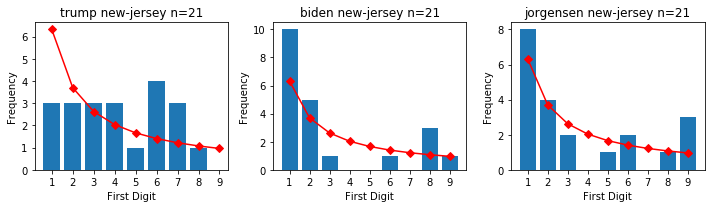

trump chi square stat=4.67 & passes at .05 p-value (critical value 15.51): True
biden chi square stat=0.57 & passes at .05 p-value (critical value 15.51): True
jorgensen chi square stat=3.79 & passes at .05 p-value (critical value 15.51): True


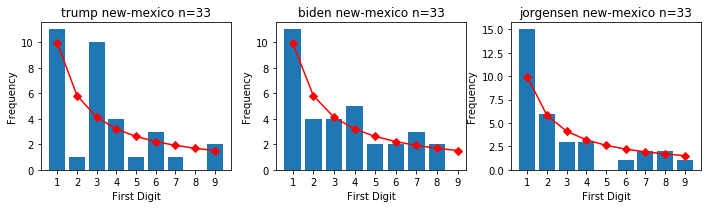

trump chi square stat=8.43 & passes at .05 p-value (critical value 15.51): True
biden chi square stat=3.56 & passes at .05 p-value (critical value 15.51): True
jorgensen chi square stat=9.06 & passes at .05 p-value (critical value 15.51): True


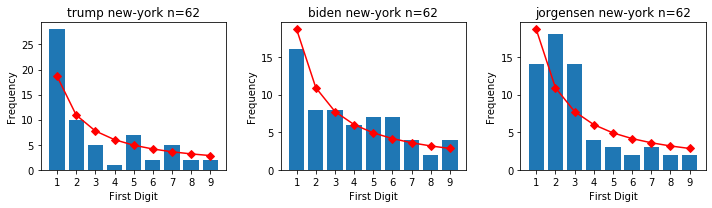

trump chi square stat=1.0 & passes at .05 p-value (critical value 15.51): True
biden chi square stat=0.73 & passes at .05 p-value (critical value 15.51): True
jorgensen chi square stat=2.24 & passes at .05 p-value (critical value 15.51): True


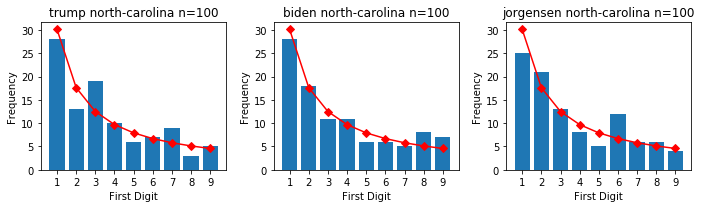

trump chi square stat=6.91 & passes at .05 p-value (critical value 15.51): True
biden chi square stat=3.97 & passes at .05 p-value (critical value 15.51): True
jorgensen chi square stat=5.21 & passes at .05 p-value (critical value 15.51): True


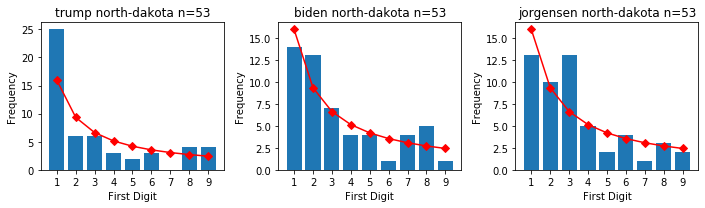

trump chi square stat=8.52 & passes at .05 p-value (critical value 15.51): True
biden chi square stat=5.62 & passes at .05 p-value (critical value 15.51): True
jorgensen chi square stat=9.76 & passes at .05 p-value (critical value 15.51): True


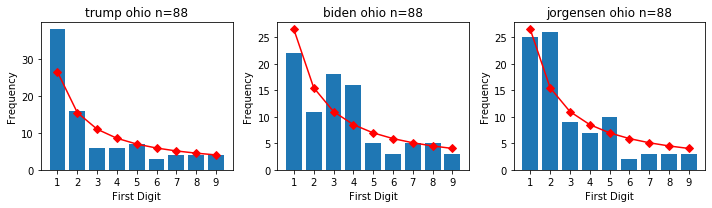

trump chi square stat=5.09 & passes at .05 p-value (critical value 15.51): True
biden chi square stat=1.44 & passes at .05 p-value (critical value 15.51): True
jorgensen chi square stat=6.23 & passes at .05 p-value (critical value 15.51): True


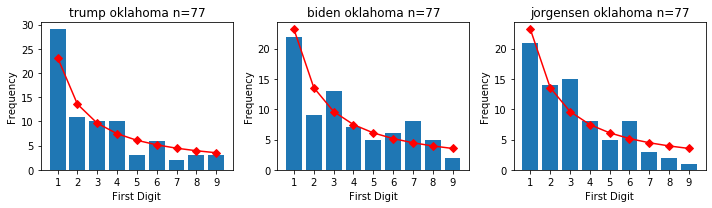

trump chi square stat=4.1 & passes at .05 p-value (critical value 15.51): True
biden chi square stat=1.04 & passes at .05 p-value (critical value 15.51): True
jorgensen chi square stat=1.78 & passes at .05 p-value (critical value 15.51): True


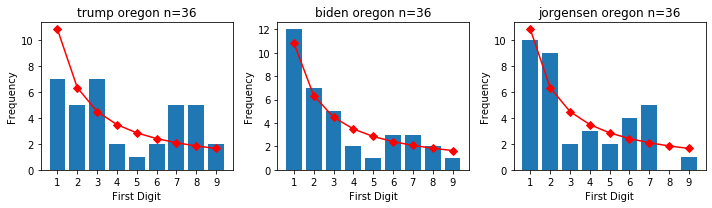

trump chi square stat=5.93 & passes at .05 p-value (critical value 15.51): True
biden chi square stat=3.06 & passes at .05 p-value (critical value 15.51): True
jorgensen chi square stat=3.33 & passes at .05 p-value (critical value 15.51): True


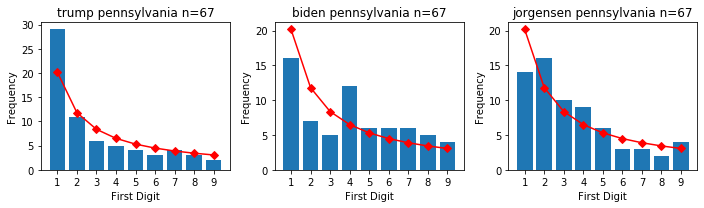

trump chi square stat=0.95 & passes at .05 p-value (critical value 15.51): True
biden chi square stat=1.81 & passes at .05 p-value (critical value 15.51): True
jorgensen chi square stat=1.88 & passes at .05 p-value (critical value 15.51): True


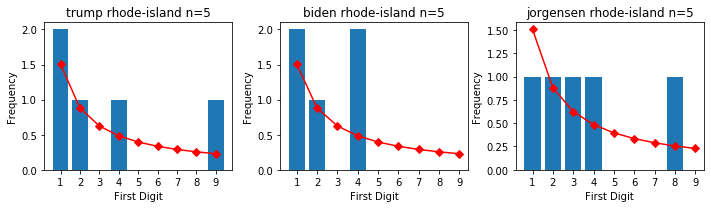

trump chi square stat=4.24 & passes at .05 p-value (critical value 15.51): True
biden chi square stat=1.94 & passes at .05 p-value (critical value 15.51): True
jorgensen chi square stat=0.85 & passes at .05 p-value (critical value 15.51): True


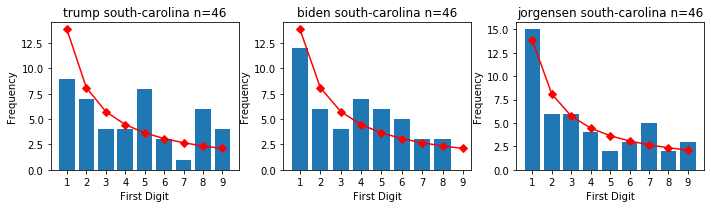

trump chi square stat=1.31 & passes at .05 p-value (critical value 15.51): True
biden chi square stat=3.7 & passes at .05 p-value (critical value 15.51): True
jorgensen chi square stat=4.35 & passes at .05 p-value (critical value 15.51): True


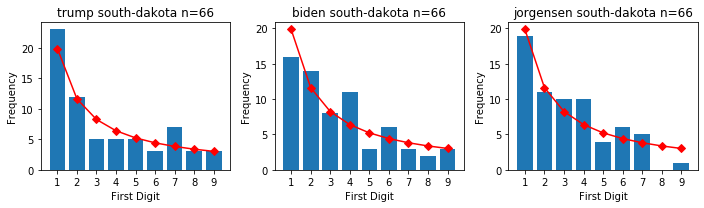

trump chi square stat=1.03 & passes at .05 p-value (critical value 15.51): True
biden chi square stat=1.57 & passes at .05 p-value (critical value 15.51): True
jorgensen chi square stat=6.97 & passes at .05 p-value (critical value 15.51): True


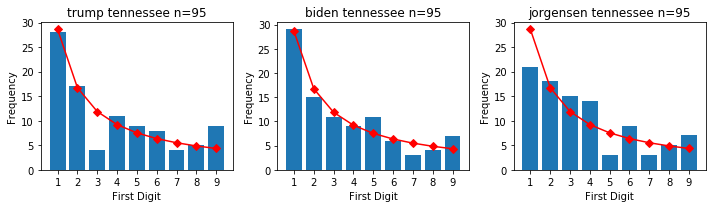

trump chi square stat=4.24 & passes at .05 p-value (critical value 15.51): True
biden chi square stat=1.77 & passes at .05 p-value (critical value 15.51): True
jorgensen chi square stat=3.79 & passes at .05 p-value (critical value 15.51): True


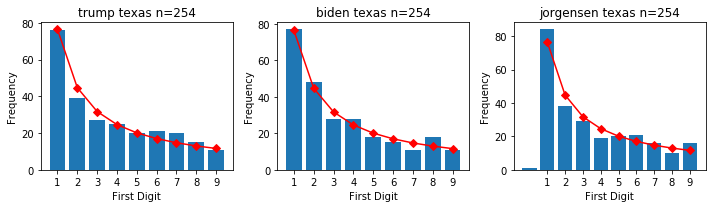

trump chi square stat=1.07 & passes at .05 p-value (critical value 15.51): True
biden chi square stat=0.82 & passes at .05 p-value (critical value 15.51): True
jorgensen chi square stat=1.75 & passes at .05 p-value (critical value 15.51): True


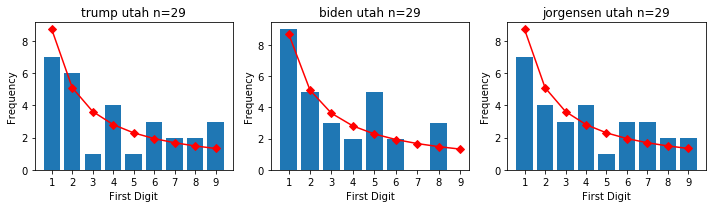

trump chi square stat=3.18 & passes at .05 p-value (critical value 15.51): True
biden chi square stat=3.94 & passes at .05 p-value (critical value 15.51): True
jorgensen chi square stat=2.89 & passes at .05 p-value (critical value 15.51): True


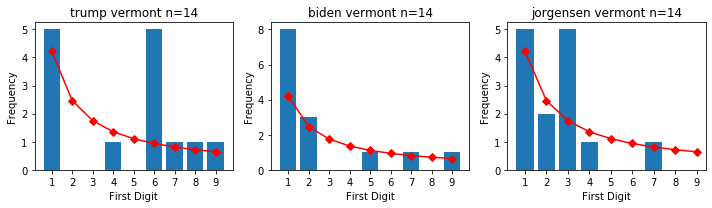

trump chi square stat=0.6 & passes at .05 p-value (critical value 15.51): True
biden chi square stat=4.79 & passes at .05 p-value (critical value 15.51): True
jorgensen chi square stat=2.47 & passes at .05 p-value (critical value 15.51): True


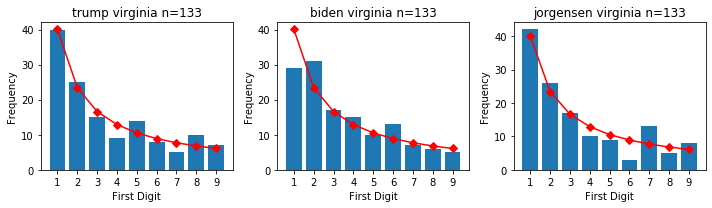

trump chi square stat=2.45 & passes at .05 p-value (critical value 15.51): True
biden chi square stat=1.96 & passes at .05 p-value (critical value 15.51): True
jorgensen chi square stat=1.02 & passes at .05 p-value (critical value 15.51): True


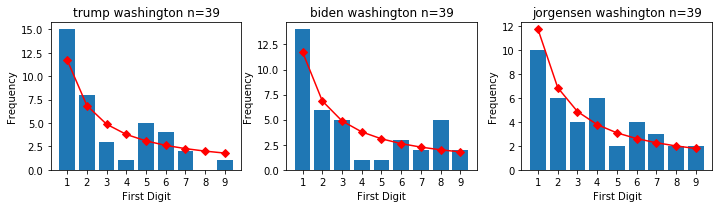

trump chi square stat=2.02 & passes at .05 p-value (critical value 15.51): True
biden chi square stat=1.61 & passes at .05 p-value (critical value 15.51): True
jorgensen chi square stat=0.48 & passes at .05 p-value (critical value 15.51): True


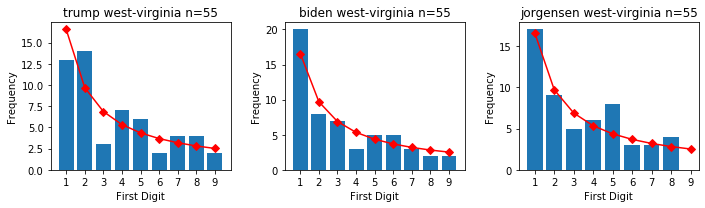

trump chi square stat=3.13 & passes at .05 p-value (critical value 15.51): True
biden chi square stat=6.15 & passes at .05 p-value (critical value 15.51): True
jorgensen chi square stat=3.03 & passes at .05 p-value (critical value 15.51): True


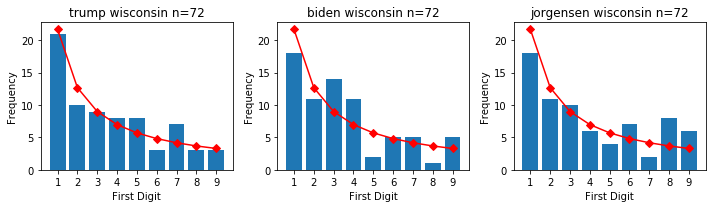

trump chi square stat=1.21 & passes at .05 p-value (critical value 15.51): True
biden chi square stat=1.01 & passes at .05 p-value (critical value 15.51): True
jorgensen chi square stat=2.89 & passes at .05 p-value (critical value 15.51): True


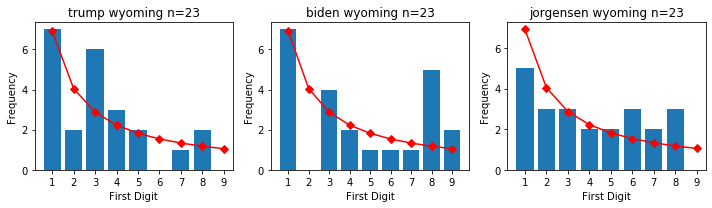

In [360]:
collist = df.columns[-3:]
candidates = ['trump','biden','jorgensen']
for state in states:
    N = len(df[df.state == state])
    digit = np.arange(1, 10)
    expected = np.log10(1 + 1/digit) * N
    plt.subplots(1,3,figsize=(10,3))
    for idx in range(len(collist)):
        v = df[df.state == state][collist[idx]].value_counts()
        plt.subplot(1, 3, idx+1)
        plt.bar(v.index, v.values)
        plt.xticks(range(1, 10))
        plt.plot(digit, expected, marker='D', color='red')
        plt.title(candidates[idx]+' '+state+' n='+str(N))
        plt.xlabel('First Digit')
        plt.ylabel('Frequency')
        chi_stat, passes = chi_square_test(v.values, expected)
        print(candidates[idx]+' chi square stat='+str(round(chi_stat,2))+' & passes at .05 p-value (critical value 15.51): '+str(passes))
    plt.tight_layout()
    plt.show()

In [320]:
### TIGHT RACES
# MICHIGAN 
# source: https://detroitmi.gov/webapp/election-results
dir_ = [f for f in os.listdir('./michigan precinct results/') if not f.startswith('.')]

trump chi square stat=12.27 & passes at .05 p-value (critical value 15.51): True
biden chi square stat=53.87 & passes at .05 p-value (critical value 15.51): False
jorgensen chi square stat=101.37 & passes at .05 p-value (critical value 15.51): False


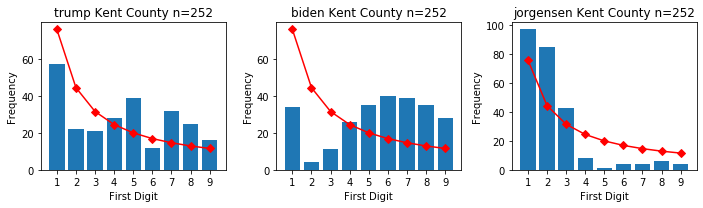

trump chi square stat=3.63 & passes at .05 p-value (critical value 15.51): True
biden chi square stat=2.66 & passes at .05 p-value (critical value 15.51): True
jorgensen chi square stat=14.3 & passes at .05 p-value (critical value 15.51): True


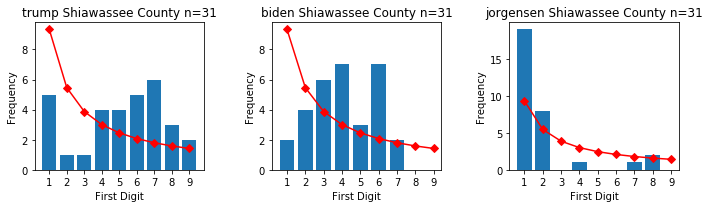

trump chi square stat=3.73 & passes at .05 p-value (critical value 15.51): True
biden chi square stat=2.64 & passes at .05 p-value (critical value 15.51): True
jorgensen chi square stat=2.32 & passes at .05 p-value (critical value 15.51): True


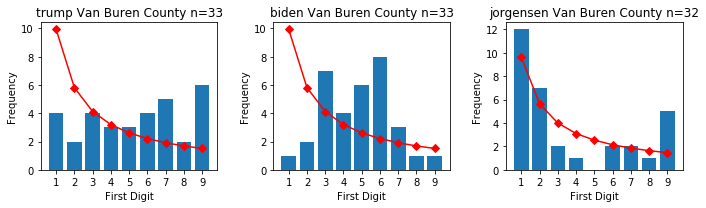

trump chi square stat=2.97 & passes at .05 p-value (critical value 15.51): True
biden chi square stat=6.2 & passes at .05 p-value (critical value 15.51): True
jorgensen chi square stat=21.71 & passes at .05 p-value (critical value 15.51): False


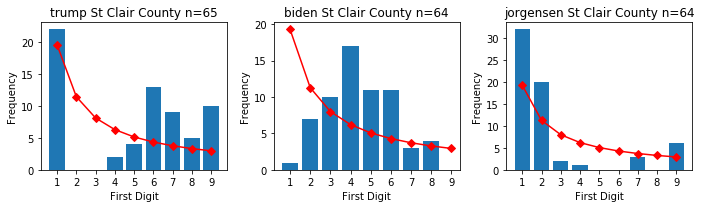

trump chi square stat=13.43 & passes at .05 p-value (critical value 15.51): True
biden chi square stat=5.87 & passes at .05 p-value (critical value 15.51): True
jorgensen chi square stat=15.4 & passes at .05 p-value (critical value 15.51): True


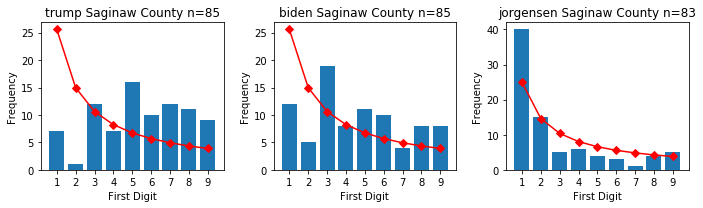

trump chi square stat=2.19 & passes at .05 p-value (critical value 15.51): True
biden chi square stat=4.65 & passes at .05 p-value (critical value 15.51): True
jorgensen chi square stat=11.21 & passes at .05 p-value (critical value 15.51): True


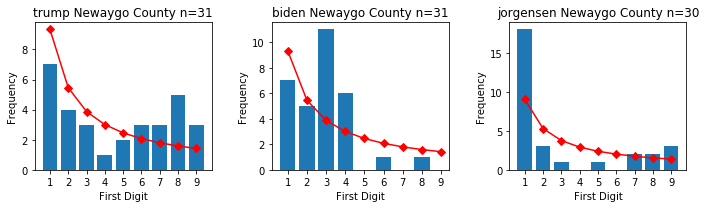

trump chi square stat=5.98 & passes at .05 p-value (critical value 15.51): True
biden chi square stat=6.38 & passes at .05 p-value (critical value 15.51): True
jorgensen chi square stat=14.15 & passes at .05 p-value (critical value 15.51): True


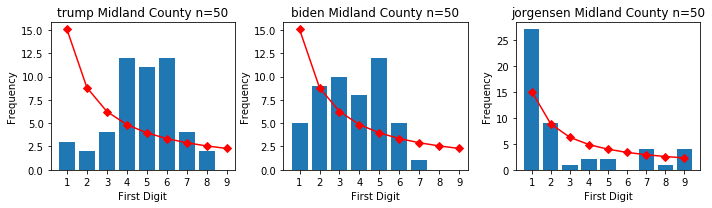

trump chi square stat=24.42 & passes at .05 p-value (critical value 15.51): False
biden chi square stat=278.28 & passes at .05 p-value (critical value 15.51): False
jorgensen chi square stat=113.06 & passes at .05 p-value (critical value 15.51): False


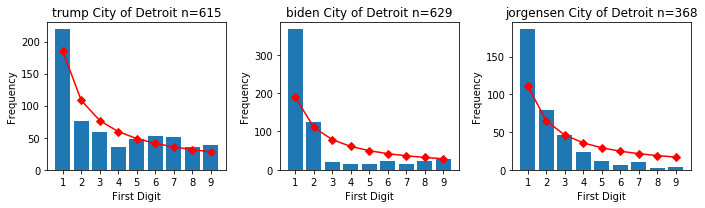

trump chi square stat=1.1 & passes at .05 p-value (critical value 15.51): True
biden chi square stat=5.32 & passes at .05 p-value (critical value 15.51): True
jorgensen chi square stat=8.17 & passes at .05 p-value (critical value 15.51): True


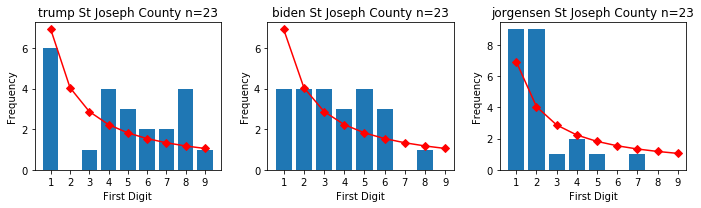

trump chi square stat=2.03 & passes at .05 p-value (critical value 15.51): True
biden chi square stat=0.36 & passes at .05 p-value (critical value 15.51): True
jorgensen chi square stat=0.94 & passes at .05 p-value (critical value 15.51): True


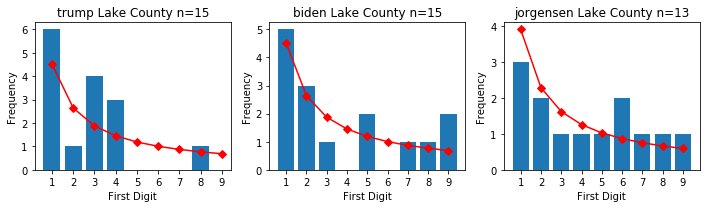

trump chi square stat=1.18 & passes at .05 p-value (critical value 15.51): True
biden chi square stat=0.46 & passes at .05 p-value (critical value 15.51): True
jorgensen chi square stat=0.75 & passes at .05 p-value (critical value 15.51): True


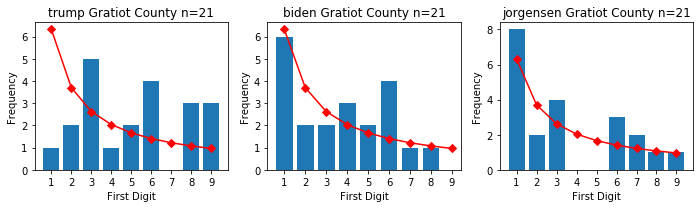

trump chi square stat=0 & passes at .05 p-value (critical value 15.51): True
biden chi square stat=0 & passes at .05 p-value (critical value 15.51): True
jorgensen chi square stat=0 & passes at .05 p-value (critical value 15.51): True


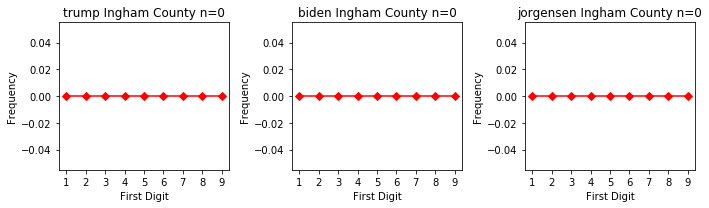

trump chi square stat=0.94 & passes at .05 p-value (critical value 15.51): True
biden chi square stat=1.44 & passes at .05 p-value (critical value 15.51): True
jorgensen chi square stat=4.42 & passes at .05 p-value (critical value 15.51): True


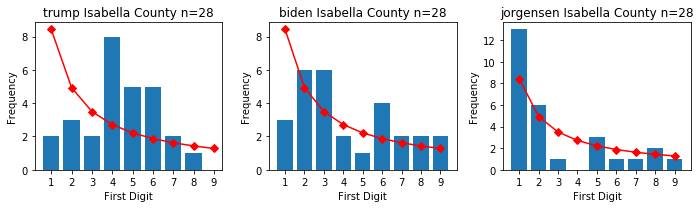

trump chi square stat=0.56 & passes at .05 p-value (critical value 15.51): True
biden chi square stat=3.01 & passes at .05 p-value (critical value 15.51): True
jorgensen chi square stat=3.99 & passes at .05 p-value (critical value 15.51): True


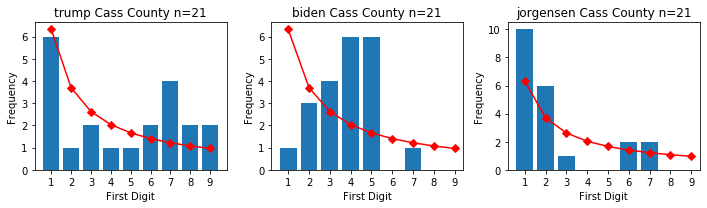

trump chi square stat=1.43 & passes at .05 p-value (critical value 15.51): True
biden chi square stat=4.15 & passes at .05 p-value (critical value 15.51): True
jorgensen chi square stat=3.1 & passes at .05 p-value (critical value 15.51): True


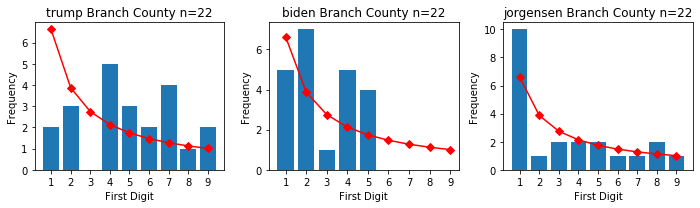

In [ ]:
dfs = []
for county in dir_:
    df = pd.read_csv('./michigan precinct results/'+county)[1:]
    trumpcol = [i for i in df.columns if re.search('trump',i,re.IGNORECASE)][0]
    bidencol = [i for i in df.columns if re.search('biden',i,re.IGNORECASE)][0]
    jorgencol = [i for i in df.columns if re.search('jorgensen',i,re.IGNORECASE)][0]
    df[trumpcol] = pd.to_numeric(df[trumpcol].apply(lambda x: x if isinstance(x, int) else x.replace(',','')))
    df[bidencol] = pd.to_numeric(df[bidencol].apply(lambda x: x if isinstance(x, int) else x.replace(',','')))
    df[jorgencol] = pd.to_numeric(df[jorgencol].apply(lambda x: x if isinstance(x, int) else x.replace(',','')))
    df['trump_1st_digit'] = df[trumpcol].apply(lambda x: int(str(x)[0]))
    df['biden_1st_digit'] = df[bidencol].apply(lambda x: int(str(x)[0]))
    df['jorgensen_1st_digit'] = df[jorgencol].apply(lambda x: int(str(x)[0]))
    dfs.append(df[['trump_1st_digit','biden_1st_digit','jorgensen_1st_digit']])
    collist = df.columns[-3:]
    candidates = ['trump','biden','jorgensen']
    plt.subplots(1,3,figsize=(10,3))
    for idx in range(len(collist)):
        digit = np.arange(1, 10)
        N = len(df[df[collist[idx]] > 0])
        expected = np.log10(1 + 1/digit) * N
        v = df[df[collist[idx]] > 0][collist[idx]].value_counts()
        plt.subplot(1, 3, idx+1)
        plt.bar(v.index, v.values)
        plt.xticks(range(1, 10))
        plt.plot(digit, expected, marker='D', color='red')
        plt.title(candidates[idx]+' '+county.strip('.csv')+' n='+str(N))
        plt.xlabel('First Digit')
        plt.ylabel('Frequency')
        chi_stat, passes = chi_square_test(v.values, expected)
        print(candidates[idx]+' chi square stat='+str(round(chi_stat,2))+' & passes at .05 p-value (critical value 15.51): '+str(passes))
    plt.tight_layout()
    plt.show()

trump chi square stat=113.24 & passes at .05 p-value (critical value 15.51): False
biden chi square stat=40.13 & passes at .05 p-value (critical value 15.51): False
jorgensen chi square stat=270.77 & passes at .05 p-value (critical value 15.51): False


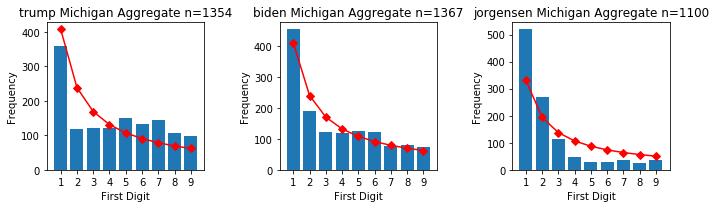

In [367]:
df = pd.concat(dfs)
collist = df.columns[-3:]
plt.subplots(1,3,figsize=(10,3))
candidates = ['trump','biden','jorgensen']
for idx in range(len(df.columns)):
    digit = np.arange(1, 10)
    N = len(df[df[collist[idx]] > 0])
    expected = np.log10(1 + 1/digit) * N
    v = df[df[collist[idx]] > 0][collist[idx]].value_counts()
    plt.subplot(1, 3, idx+1)
    plt.bar(v.index, v.values)
    plt.xticks(range(1,10))
    plt.plot(digit, expected, marker='D', color='red')
    plt.title(candidates[idx]+' Michigan Aggregate n='+str(N))
    plt.xlabel('First Digit')
    plt.ylabel('Frequency')
    chi_stat, passes = chi_square_test(v.values, expected)
    print(candidates[idx]+' chi square stat='+str(round(chi_stat,2))+' & passes at .05 p-value (critical value 15.51): '+str(passes))
plt.tight_layout()
plt.show()